In [ ]:
import os
from PIL import Image

# Function to check image resolution
def get_image_resolution(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

# Function to move images based on resolution
def move_images(folder_path):
    # Create folders if not exist
    lr_folder = os.path.join(folder_path, "lr")
    hr_folder = os.path.join(folder_path, "hr")
    os.makedirs(lr_folder, exist_ok=True)
    os.makedirs(hr_folder, exist_ok=True)

    # Loop through images in folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            width, height = get_image_resolution(image_path)
            if width == 1280 and height == 720:
                os.rename(image_path, os.path.join(lr_folder, filename))
                print(f"Moved {filename} to 'lr' folder.")
            elif width == 2560 and height == 1440:
                os.rename(image_path, os.path.join(hr_folder, filename))
                print(f"Moved {filename} to 'hr' folder.")

# Specify the folder containing images
folder_path = "R:/ginka"

# Move images based on resolution
move_images(folder_path)


In [ ]:
import os
import random
import string

# Function to generate random string
def generate_random_string(length=8):
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for _ in range(length))

# Function to rename files to random strings
def rename_files(folder_path):
    # Loop through files in folder
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            # Generate random string
            random_name = generate_random_string()
            # Get file extension
            _, ext = os.path.splitext(filename)
            # Rename file
            new_filename = random_name + ext
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
            print(f"Renamed {filename} to {new_filename}")

# Specify the folder containing files
folder_path = "R:/ginka/lr"

# Rename files to random strings
rename_files(folder_path)

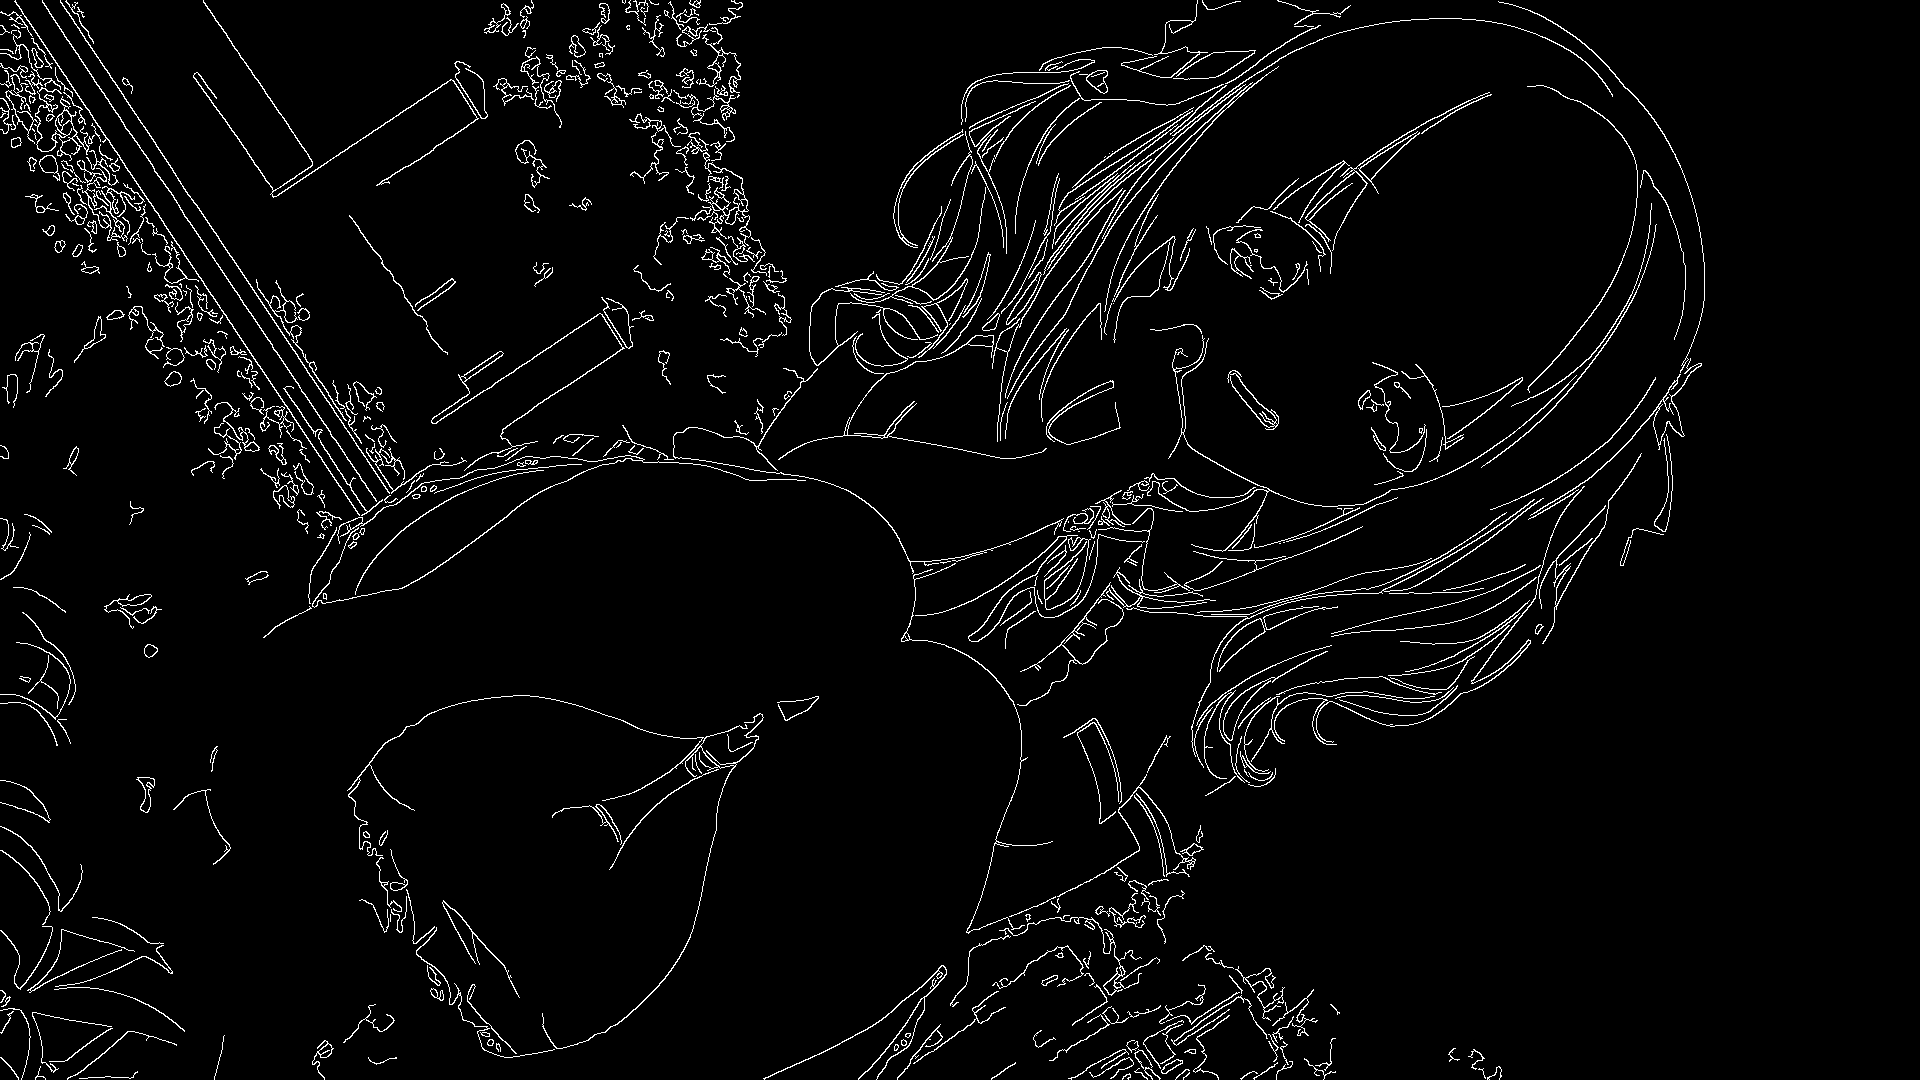

In [8]:
import numpy as np
import cv2
from PIL import Image
img = cv2.imread("R:/unless/ev/c_cha_01_a.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converting BGR to gray
# laplacian = cv2.Laplacian(img, cv2.CV_64F)
# out = np.abs(laplacian)
# Image.fromarray(cv2.convertScaleAbs(out/np.max(out)*255))

blur = cv2.GaussianBlur(img,(5,5),0)
canny = cv2.Canny(blur, 100, 300)
out = np.abs(canny)
Image.fromarray(cv2.convertScaleAbs(out/np.max(out)*255))